In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
import operator
np.set_printoptions(suppress=True)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# from fastdtw import fastdtw
from dtaidistance import dtw
from scipy.spatial.distance import euclidean
from tqdm import tqdm
import csv

from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

In [2]:
data = pd.read_csv('C:/Users/maria/OneDrive/Desktop/Smart_Meter_Data/StandardiseJune.txt', sep=" ")
# data['date'] = pd.to_datetime(data['date'], format='%y-%m-%d')

In [3]:
data.dtypes

id          int64
demand    float64
day         int64
period      int64
dow         int64
tow         int64
week        int64
date       object
month       int64
dtype: object

In [4]:
# all_id = data.id.unique()

In [5]:
# import random
# random.seed(7)
# fifty_id = list(random.sample(list(all_id), 50))

# fifty_ = data.id.isin(fifty_id)
# df = data[fifty_]

# df1 = df.groupby(['id']).demand.apply(np.array).reset_index()
# df1

In [6]:
# df = data[data.month==6]

In [7]:
df1 = data.groupby(['id']).demand.apply(np.array).reset_index()
df1

id                                             demand
0    1002  [0.0006076784603412, -0.3128081463572393, -0.4...
1    1003  [-0.1519940357605612, 0.0720452144392567, -0.0...
2    1004  [0.0361589163961406, -0.3689929218036488, -0.6...
3    1005  [-0.4549845300125258, -0.5046102771389359, -0....
4    1006  [-0.4033746192413793, -0.1962310915617392, -0....
..    ...                                                ...
551  1992  [-0.3303403880231154, -0.4612215384235216, -0....
552  1993  [-0.0886942845106046, -0.4055142481636712, -0....
553  1994  [0.156094281085879, -0.1345759162607582, -0.01...
554  1996  [0.036684229759725, 3.4624274593753137, 0.7911...
555  1997  [-0.6693775180322503, -0.5424123577831101, -0....

[556 rows x 2 columns]

In [17]:
df1[df1.index==535]

id                                             demand
535  1964  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...

In [8]:
dd_v1 = df1['demand'].to_numpy()
dd_arr1 = np.vstack(dd_v1)
print(dd_arr1.shape)
color_arr4 = df1['id'].to_numpy()
print(color_arr4.shape)

(556, 1440)
(556,)


In [19]:
np.where(np.isnan(dd_arr1))

(array([535, 535, 535, ..., 535, 535, 535], dtype=int64),
 array([   0,    1,    2, ..., 1437, 1438, 1439], dtype=int64))

In [20]:
dd_arr1 = np.nan_to_num(dd_arr1)

In [21]:
# dtw_matrix10 = dtw.distance_matrix_fast(dd_arr1)
# np.save('dtw_matrix10_junestd.npy', dtw_matrix10)

In [22]:
dtw_matrix10 = np.load('dtw_matrix10_junestd.npy')
dtw_matrix10

array([[ 0.        , 24.89451836, 25.47544953, ..., 26.26061125,
        24.95245114, 25.7085135 ],
       [24.89451836,  0.        , 21.28589914, ..., 22.1154068 ,
        22.20413067, 21.77997387],
       [25.47544953, 21.28589914,  0.        , ..., 20.76513806,
        21.52919639, 20.7848082 ],
       ...,
       [26.26061125, 22.1154068 , 20.76513806, ...,  0.        ,
        22.29376319, 21.34861225],
       [24.95245114, 22.20413067, 21.52919639, ..., 22.29376319,
         0.        , 21.38886518],
       [25.7085135 , 21.77997387, 20.7848082 , ..., 21.34861225,
        21.38886518,  0.        ]])

In [11]:
color_arr4

array([1002, 1003, 1004, 1005, 1006, 1009, 1013, 1014, 1015, 1016, 1018,
       1020, 1022, 1024, 1027, 1030, 1033, 1035, 1036, 1037, 1039, 1041,
       1042, 1044, 1045, 1047, 1052, 1053, 1054, 1055, 1057, 1058, 1059,
       1060, 1061, 1062, 1064, 1065, 1067, 1069, 1071, 1073, 1074, 1075,
       1076, 1077, 1079, 1081, 1082, 1083, 1084, 1085, 1086, 1088, 1091,
       1093, 1095, 1096, 1099, 1102, 1105, 1107, 1108, 1109, 1110, 1115,
       1119, 1120, 1121, 1122, 1123, 1124, 1126, 1130, 1132, 1133, 1136,
       1138, 1139, 1140, 1141, 1143, 1144, 1147, 1148, 1153, 1155, 1156,
       1157, 1160, 1161, 1164, 1165, 1168, 1170, 1171, 1174, 1178, 1180,
       1182, 1183, 1184, 1185, 1191, 1196, 1197, 1198, 1199, 1200, 1201,
       1202, 1203, 1210, 1212, 1214, 1217, 1219, 1220, 1222, 1224, 1225,
       1227, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1239, 1241,
       1247, 1255, 1257, 1260, 1262, 1263, 1264, 1265, 1269, 1270, 1271,
       1273, 1274, 1276, 1277, 1278, 1280, 1281, 12

In [12]:
# # Unique category labels: 'D', 'F', 'G', ...
# color_labels = df1['id'].unique()

# # List of RGB triplets
# rgb_values = plt.cm.get_cmap('viridis', 100)
# # rgb_values = sns.color_palette("Set2", 8)

# # Map label to RGB
# color_map = dict(zip(color_labels, rgb_values))

# MDS

(-47.834021132280775,
 47.200324967295636,
 -48.73283091955166,
 50.898376733576654)

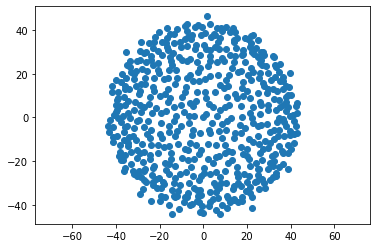

In [23]:
model_MDS = MDS(n_components=2, random_state=1)
out_MDS1 = model_MDS.fit_transform(dd_arr1)
plt.scatter(out_MDS1[:, 0], out_MDS1[:, 1])
# plt.scatter(out_MDS1[:, 0], out_MDS1[:, 1],c=color_arr4, cmap=plt.cm.get_cmap('viridis', 50))
# plt.colorbar()
plt.axis('equal')

(-32.039176231109444,
 36.27099455237966,
 -38.753742222271526,
 27.824838237342068)

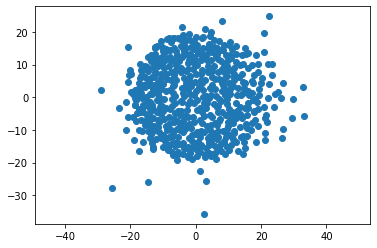

In [24]:
model_MDS = MDS(n_components=2,dissimilarity='precomputed', random_state=1)
out_MDS20 = model_MDS.fit_transform(dtw_matrix10)
plt.scatter(out_MDS20[:, 0], out_MDS20[:, 1])
plt.axis('equal')

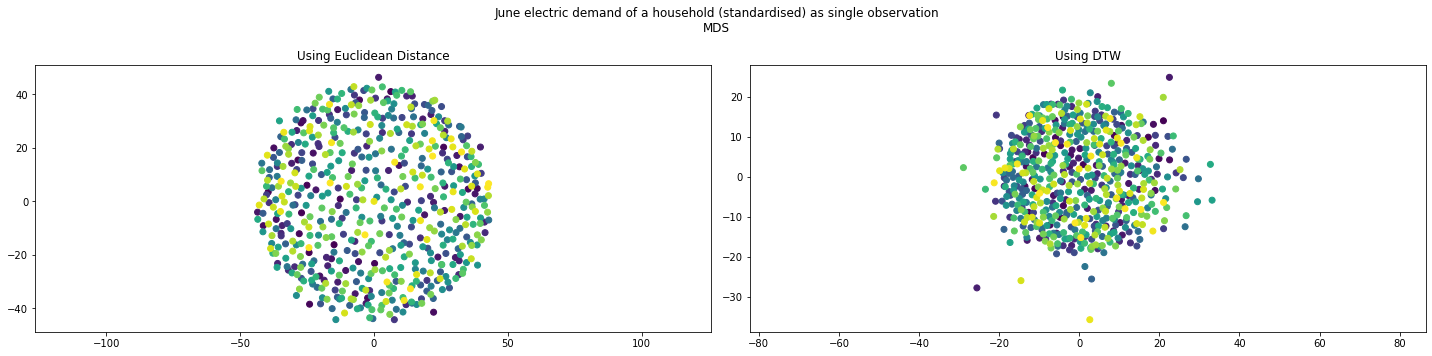

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
(ax1, ax2)=axs
ax1.scatter(out_MDS1[:, 0], out_MDS1[:, 1],c=color_arr4, cmap=plt.cm.get_cmap('viridis', 556))
ax1.set_title("Using Euclidean Distance")
ax1.axis('equal')

im = ax2.scatter(out_MDS20[:, 0], out_MDS20[:, 1],c=color_arr4, cmap=plt.cm.get_cmap('viridis',556))
ax2.set_title("Using DTW")
ax2.axis('equal')


# fig.colorbar(im,ax=axs,label='id')
fig.suptitle("June electric demand of a household (standardised) as single observation\nMDS")
plt.tight_layout()
plt.show()

In [26]:
import plotly.express as px
def array_to_pd(my_array):
    '''Convert numpy.ndarray into pandas dataframe
    input: (N,2)array
    output: df '''
    df = pd.DataFrame(my_array, columns = ['x','y'])
    return df

In [27]:
df_mds = array_to_pd(out_MDS20)
fig = px.scatter(df_mds, x="x", y="y",hover_data=[df1.id[df_mds.index]]
                )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()

In [28]:
def distance_mat(X, window=None, psi=None, n_neighbors=6):
    """
    Compute the square distance matrix using DTW
    :param X: Input data, a numpy array of shape (img_height, img_width)
    :param n_neighbors: Number of nearest neighbors to consider, int
    :return: numpy array of shape (img_height, img_height), numpy array of shape (img_height, n_neighbors)
    """

    # Compute full distance matrix
    distances = dtw_matrix10
#     distances = dtw.distance_matrix_fast(X, window=window,psi=psi)

    # Keep only the 6 nearest neighbors, others set to 0 (= unreachable)
    neighbors = np.zeros_like(distances)
    sort_distances = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
    for k,i in enumerate(sort_distances):
        neighbors[k,i] = distances[k,i]
    return neighbors, sort_distances

def center(K):
    """
    Method to center the distance matrix
    :param K: numpy array of shape mxm
    :return: numpy array of shape mxm
    """
    n_samples = K.shape[0]

    # Mean for each row/column
    meanrows = np.sum(K, axis=0) / n_samples
    meancols = (np.sum(K, axis=1)/n_samples)[:, np.newaxis]

    # Mean across all rows (entire matrix)
    meanall = meanrows.sum() / n_samples

    K -= meanrows
    K -= meancols
    K += meanall
    return K

def mds(data, n_components=2):
    """
    Apply multidimensional scaling (aka Principal Coordinates Analysis)
    :param data: nxn square distance matrix
    :param n_components: number of components for projection
    :return: projected output of shape (n_components, n)
    """

    # Center distance matrix
    center(data)
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_val_cov, eig_vec_cov = np.linalg.eig(data)
    eig_pairs = [
        (np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))
    ]
    
    # Select n_components eigenvectors with largest eigenvalues, obtain subspace transform matrix
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = np.array(eig_pairs)
    matrix_w = np.hstack(
        [eig_pairs[i, 1].reshape(data.shape[1], 1) for i in range(n_components)]
    )

    # Return samples in new subspace
    return matrix_w

def isomap(data,window=None,psi=None,n_components=2, n_neighbors=6):
    """
    Dimensionality reduction with isomap algorithm
    :param data: input image matrix of shape (n,m) if dist=False, square distance matrix of size (n,n) if dist=True
    :param n_components: number of components for projection
    :param n_neighbors: number of neighbors for distance matrix computation
    :return: Projected output of shape (n_components, n)
    """
    # Compute distance matrix
    data, _ = distance_mat(data, window,psi, n_neighbors)

    # Compute shortest paths from distance matrix
    from sklearn.utils.graph import graph_shortest_path
    graph = graph_shortest_path(data, directed=False)
    graph = -0.5 * (graph ** 2)

    # Return the MDS projection on the shortest paths graph
    return mds(graph, n_components)

(-40.94674903054773, 68.59951866635812, -48.59864310154896, 51.081811101843456)

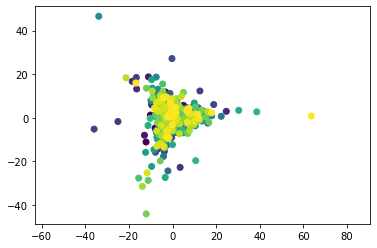

In [29]:
model_Isomap = Isomap(n_neighbors=10, n_components=2, eigen_solver='dense')
out_Isomap1 = model_Isomap.fit_transform(dd_arr1)

plt.scatter(out_Isomap1[:, 0], out_Isomap1[:, 1], c=color_arr4, cmap=plt.cm.get_cmap('viridis', 50))
plt.axis('equal')

(-0.11001636026048961,
 0.12575544133202818,
 -0.10076157001307087,
 0.16273416999692475)

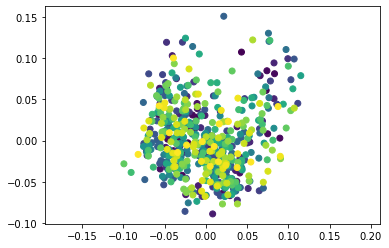

In [30]:
scratch_Isomap60 = isomap(dd_arr1,n_neighbors=10)
plt.scatter(scratch_Isomap60[:, 0], scratch_Isomap60[:, 1], c=color_arr4, cmap=plt.cm.get_cmap('viridis', 50))
plt.axis('equal')

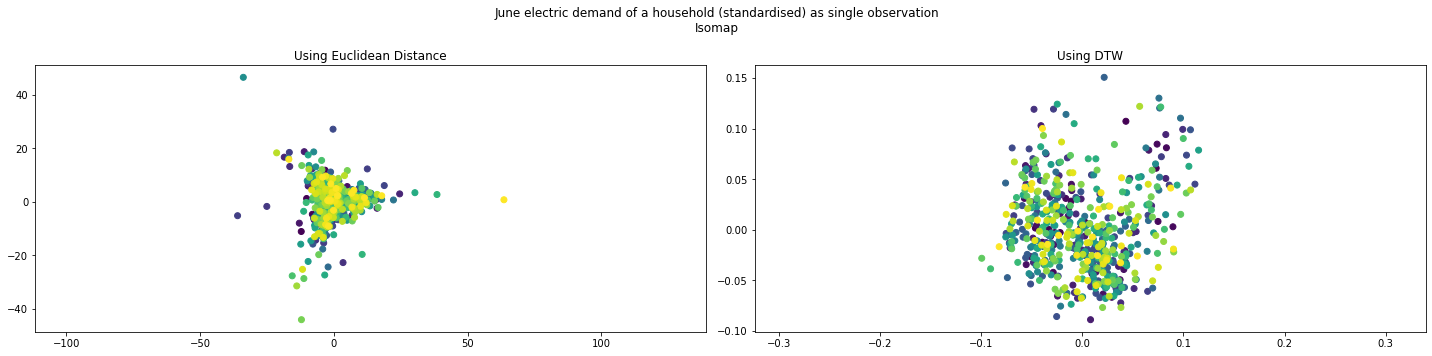

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
(ax1, ax2)=axs
ax1.scatter(out_Isomap1[:, 0], out_Isomap1[:, 1],c=color_arr4, cmap=plt.cm.get_cmap('viridis', 50))
ax1.set_title("Using Euclidean Distance")
ax1.axis('equal')

im = ax2.scatter(scratch_Isomap60[:, 0], scratch_Isomap60[:, 1],c=color_arr4,  cmap=plt.cm.get_cmap('viridis', 50))
ax2.set_title("Using DTW")
ax2.axis('equal')

# fig.colorbar(im,ax=axs,label='id')
fig.suptitle("June electric demand of a household (standardised) as single observation\nIsomap")
plt.tight_layout()
plt.show()

In [32]:
df_iso = array_to_pd(scratch_Isomap60)
fig = px.scatter(df_iso, x="x", y="y",hover_data=[df1.id[df_iso.index]],
                )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()

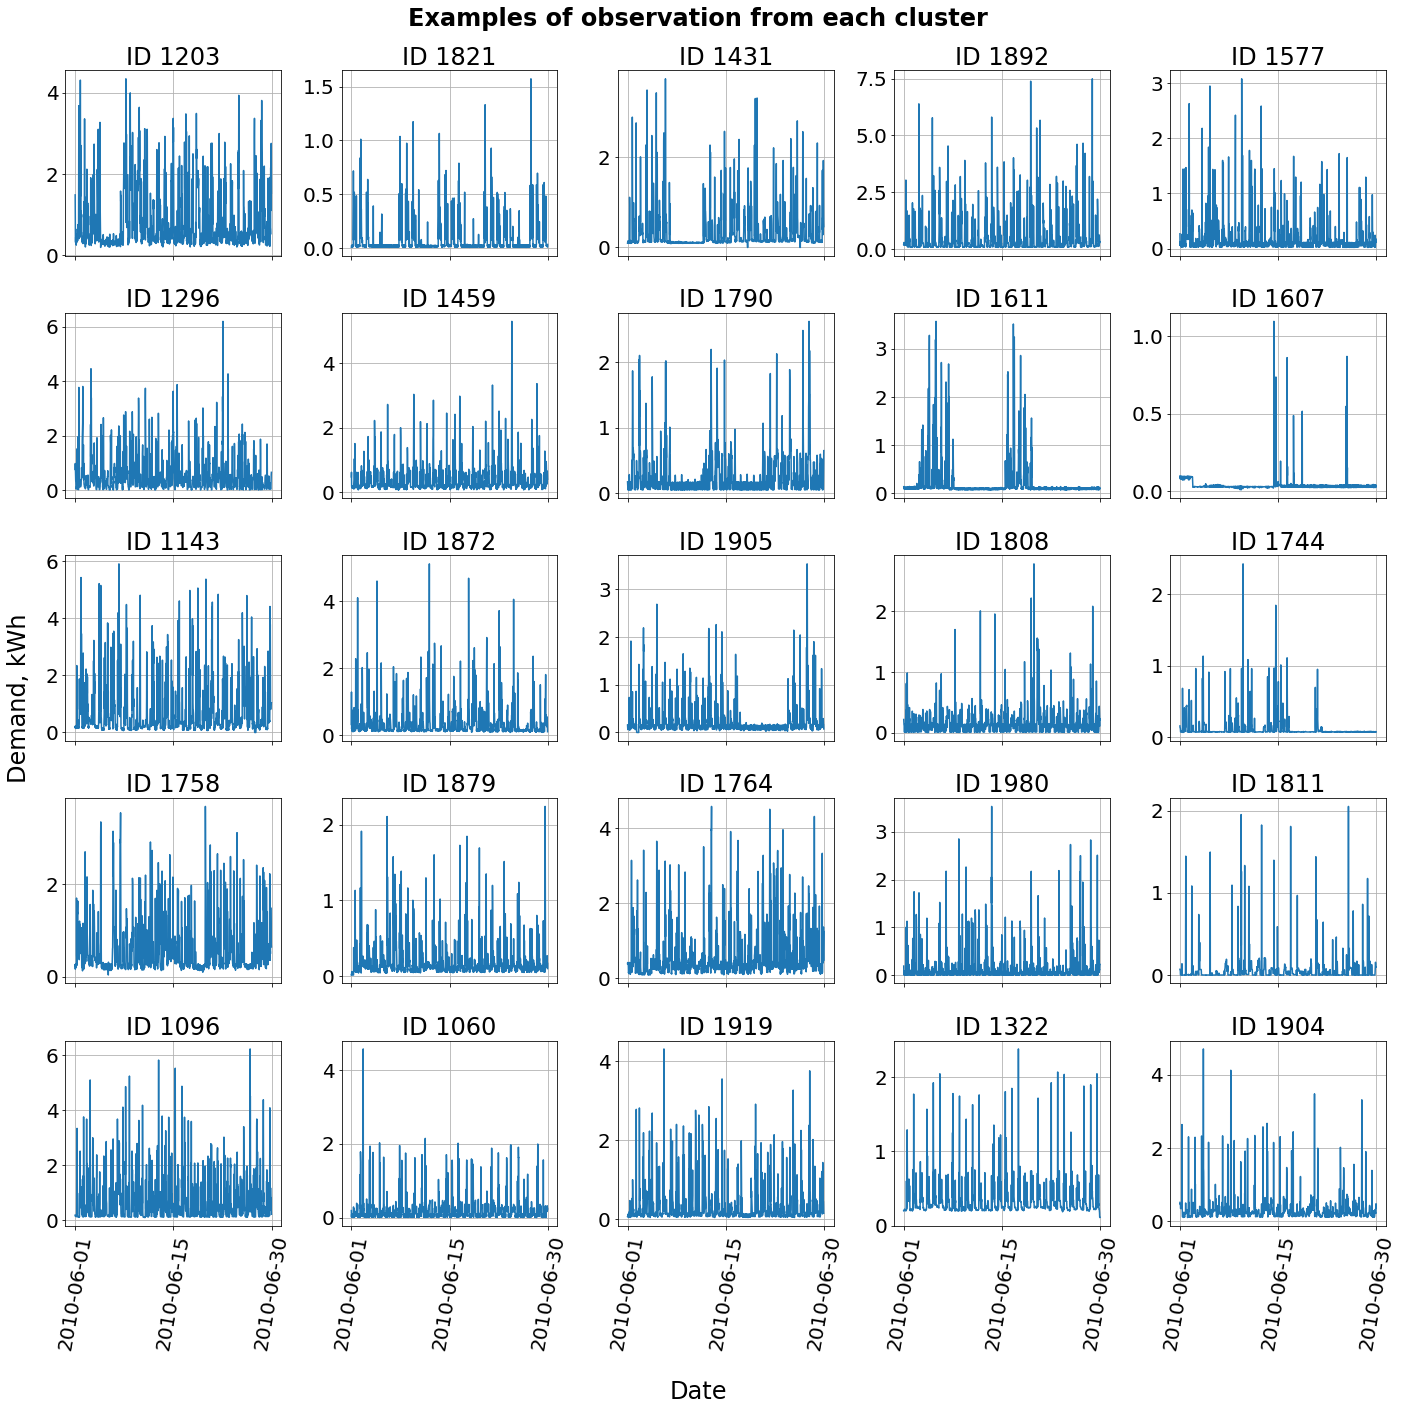

In [123]:
fig, axs = plt.subplots(nrows=5, ncols=5, sharex=True,figsize=(20, 20))
# fig.tight_layout(pad=0.5)
((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15),(ax16,ax17,ax18,ax19,ax20),(ax21,ax22,ax23,ax24,ax25))=axs

plt_d(1203,ori_df,ax1),plt_d(1821,ori_df,ax2),plt_d(1431,ori_df,ax3),plt_d(1892,ori_df,ax4),plt_d(1577,ori_df,ax5)

plt_d(1296,ori_df,ax6),plt_d(1459,ori_df,ax7),plt_d(1790,ori_df,ax8),plt_d(1611,ori_df,ax9),plt_d(1607,ori_df,ax10)

plt_d(1143,ori_df,ax11),plt_d(1872,ori_df,ax12),plt_d(1905,ori_df,ax13),plt_d(1808,ori_df,ax14),plt_d(1744,ori_df,ax15)

plt_d(1758,ori_df,ax16),plt_d(1879,ori_df,ax17),plt_d(1764,ori_df,ax18),plt_d(1980,ori_df,ax19),plt_d(1811,ori_df,ax20)

plt_d(1096,ori_df,ax21),plt_d(1060,ori_df,ax22),plt_d(1919,ori_df,ax23),plt_d(1322,ori_df,ax24),plt_d(1904,ori_df,ax25)

fig.suptitle("Examples of observation from each cluster",fontweight="bold")
fig.supxlabel('Date')
fig.supylabel('Demand, kWh')

# fig.text(0.5, 0.01, 'Period of day', ha='center')
# fig.text(0.003, 0.5, 'Demand, kWh', va='center', rotation='vertical')
# plt.xlabel("Period")
# plt.ylabel("Demand, (kwh)")
plt.tight_layout()
plt.show()
# fig.savefig('multipleJune_eg.png')

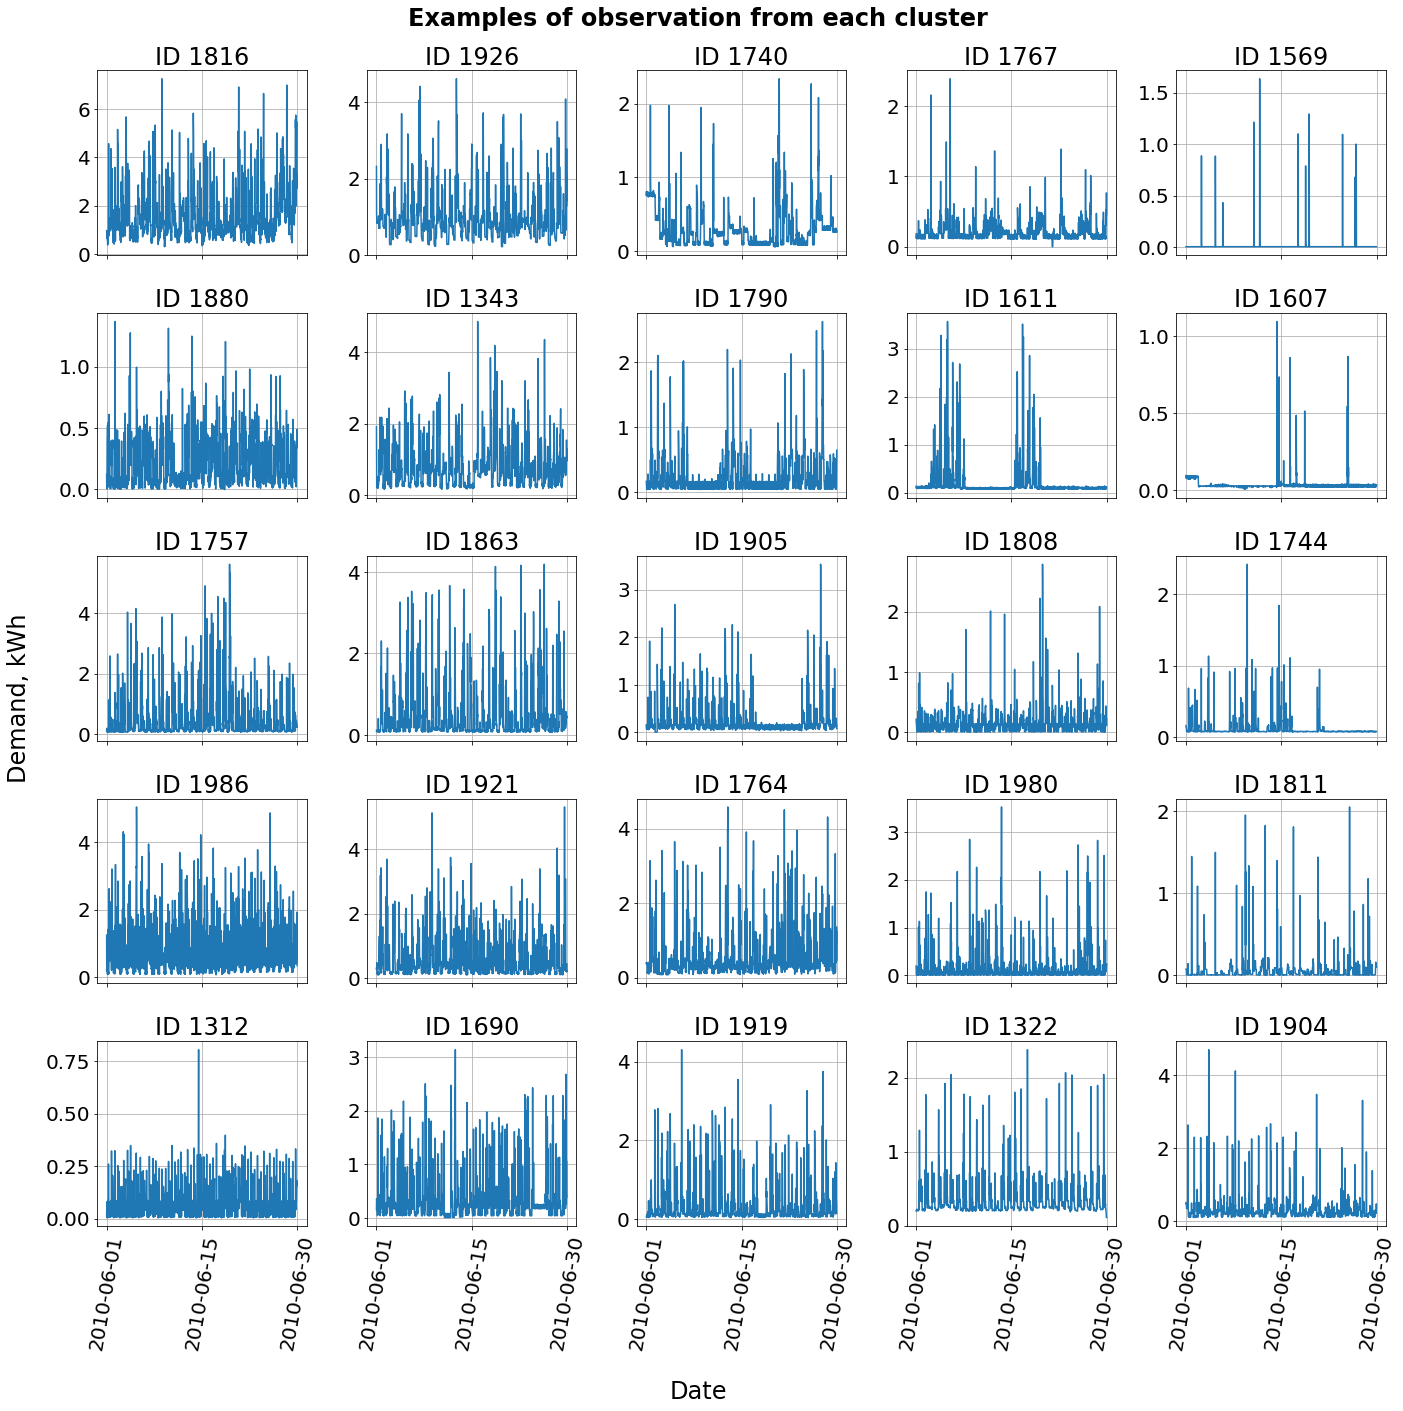

In [120]:
fig, axs = plt.subplots(nrows=5, ncols=5, sharex=True,figsize=(20, 20))
# fig.tight_layout(pad=0.5)
((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15),(ax16,ax17,ax18,ax19,ax20),(ax21,ax22,ax23,ax24,ax25))=axs

plt_d(1816,ori_df,ax1),plt_d(1926,ori_df,ax2),plt_d(1740,ori_df,ax3),plt_d(1767,ori_df,ax4),plt_d(1569,ori_df,ax5)

plt_d(1880,ori_df,ax6),plt_d(1343,ori_df,ax7),plt_d(1790,ori_df,ax8),plt_d(1611,ori_df,ax9),plt_d(1607,ori_df,ax10)

plt_d(1757,ori_df,ax11),plt_d(1863,ori_df,ax12),plt_d(1905,ori_df,ax13),plt_d(1808,ori_df,ax14),plt_d(1744,ori_df,ax15)

plt_d(1986,ori_df,ax16),plt_d(1921,ori_df,ax17),plt_d(1764,ori_df,ax18),plt_d(1980,ori_df,ax19),plt_d(1811,ori_df,ax20)

plt_d(1312,ori_df,ax21),plt_d(1690,ori_df,ax22),plt_d(1919,ori_df,ax23),plt_d(1322,ori_df,ax24),plt_d(1904,ori_df,ax25)

fig.suptitle("Examples of observation from each cluster",fontweight="bold")
fig.supxlabel('Date')
fig.supylabel('Demand, kWh')

# fig.text(0.5, 0.01, 'Period of day', ha='center')
# fig.text(0.003, 0.5, 'Demand, kWh', va='center', rotation='vertical')
# plt.xlabel("Period")
# plt.ylabel("Demand, (kwh)")
plt.tight_layout()
plt.show()
# fig.savefig('multipleJune_eg.png')

In [33]:
ori_data = pd.read_csv('C:/Users/maria/OneDrive/Desktop/Smart_Meter_Data/Complete1.txt', sep=" ")
ori_data['date'] = pd.to_datetime(ori_data['date'], format='%d-%m-%y')

In [34]:
ori_df = ori_data[ori_data.month==6]
ori_df

id  demand  day  period  dow  tow  week       date  month
14832     1002   0.222  517       1    2   49    46 2010-06-01      6
14833     1002   0.097  517       2    2   50    46 2010-06-01      6
14834     1002   0.035  517       3    2   51    46 2010-06-01      6
14835     1002   0.093  517       4    2   52    46 2010-06-01      6
14836     1002   0.040  517       5    2   53    46 2010-06-01      6
...        ...     ...  ...     ...  ...  ...   ...        ...    ...
13815787  1997   0.196  546      44    3  140    50 2010-06-30      6
13815788  1997   0.227  546      45    3  141    50 2010-06-30      6
13815789  1997   0.241  546      46    3  142    50 2010-06-30      6
13815790  1997   0.187  546      47    3  143    50 2010-06-30      6
13815791  1997   0.261  546      48    3  144    50 2010-06-30      6

[800640 rows x 9 columns]

In [117]:
def plt_d(id_wanted,ori_df,ax):
    df_temp = ori_df[ori_df.id == id_wanted]
    df_temp.reset_index(drop=True, inplace=True)
    ax.plot(df_temp["demand"])

    date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
    date_=[date_list[0],date_list[14],date_list[29]]
    ax.set_xticks([0,720,1440],minor=False)  # Set text labels and properties.
    ax.set_xticklabels(date_, rotation =80,fontdict=None, minor=False)

    ax.set_title('ID '+str(id_wanted))
    ax.grid()

In [113]:
def demand_data(id_wanted):
    df_temp = ori_df[ori_df.id == id_wanted]
    df_temp.reset_index(drop=True, inplace=True)
    ax.plot(df_temp["demand"])

    date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
    ax.set_xticks(np.arange(0, 1440, step=48),minor=False)  # Set text labels and properties.
    ax.set_xticklabels(date_list, rotation =80,fontdict=None, minor=False)

    ax.set_title('ID '+str(id_wanted))
    ax.grid()

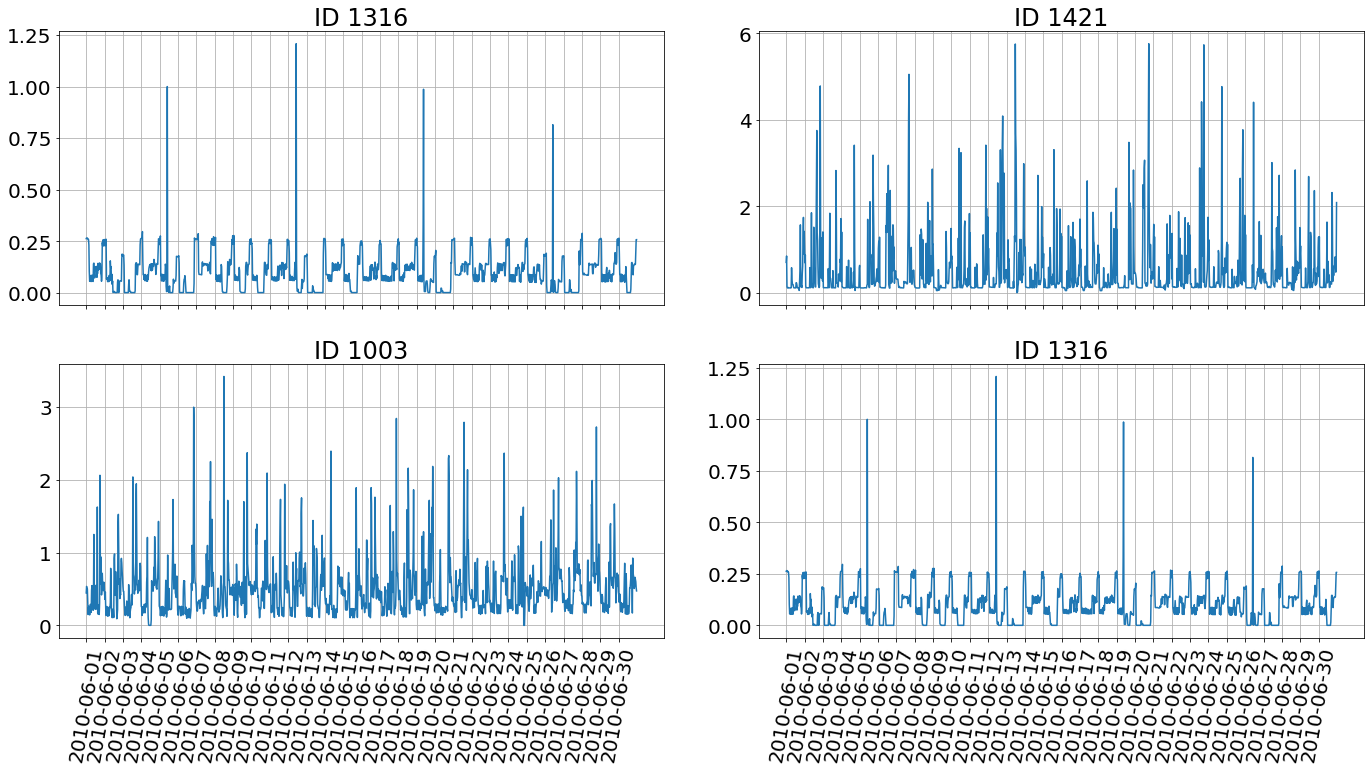

In [99]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True,figsize=(20, 10))
((ax1, ax2),(ax3, ax4))=axs
fig.tight_layout(pad=2)

# id_wanted = 1316
# df_temp = ori_df[ori_df.id == id_wanted]
# df_temp.reset_index(drop=True, inplace=True)

# date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
# ax2.plot(df_temp["demand"])
# ax4.set_xticks(np.arange(0, 1440, step=48),minor=False)  # Set text labels and properties.
# ax4.set_xticklabels(date_list, rotation =80,fontdict=None, minor=False)

# ax1.set_title('ID '+str(id_wanted))
# ax1.grid()

plot_demand(1316,ori_df,ax1)

plot_demand(1421,ori_df,ax2)

plot_demand(1003,ori_df,ax3)

plot_demand(1316,ori_df,ax4)

# plt.axis('equal')

plt.show()

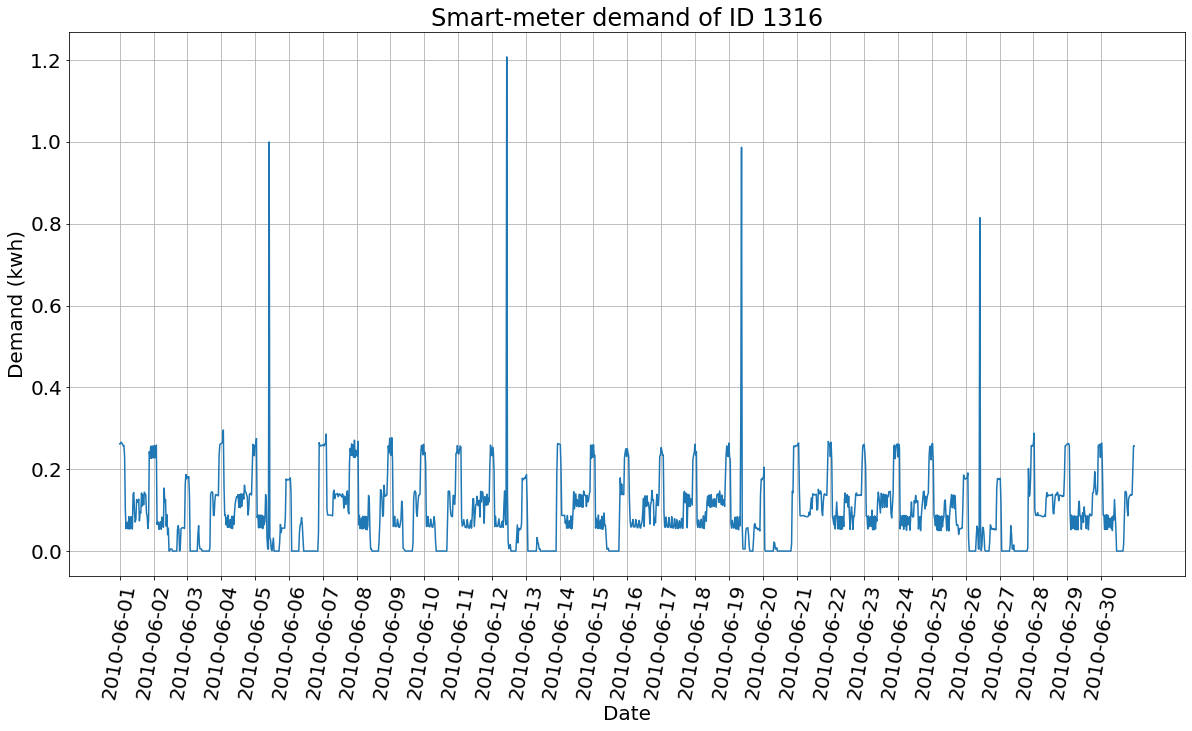

In [72]:
id_wanted = 1316
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

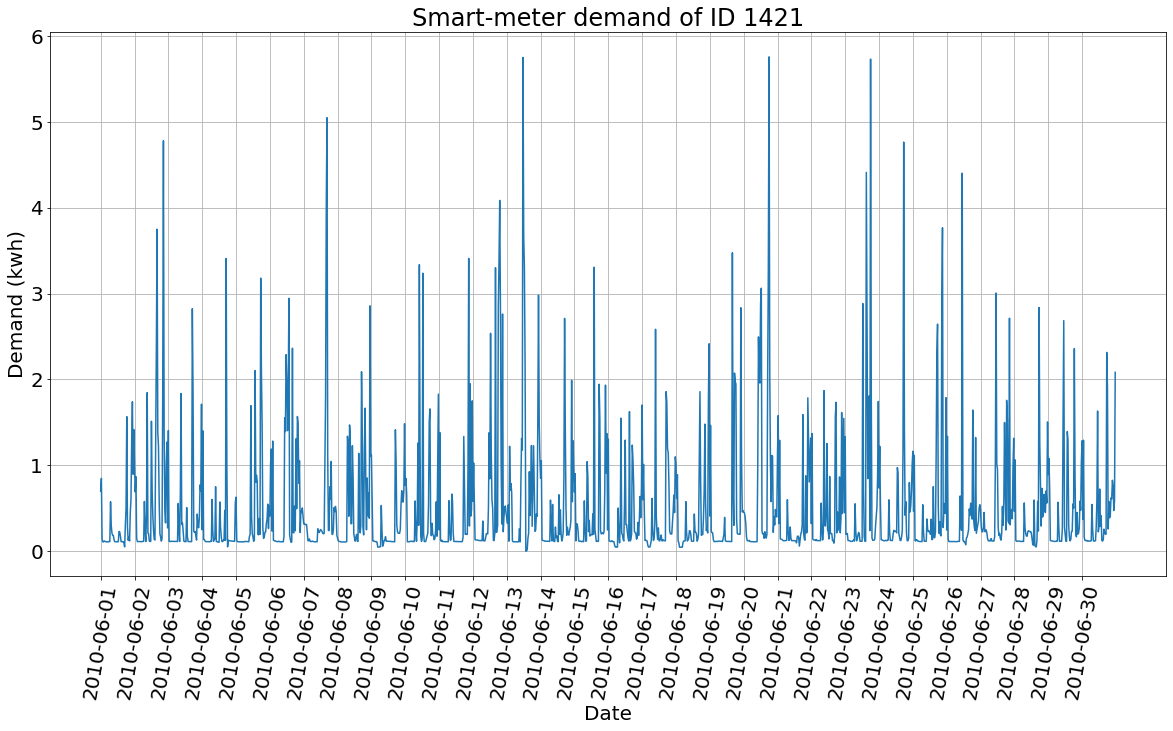

In [47]:
id_wanted = 1421
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

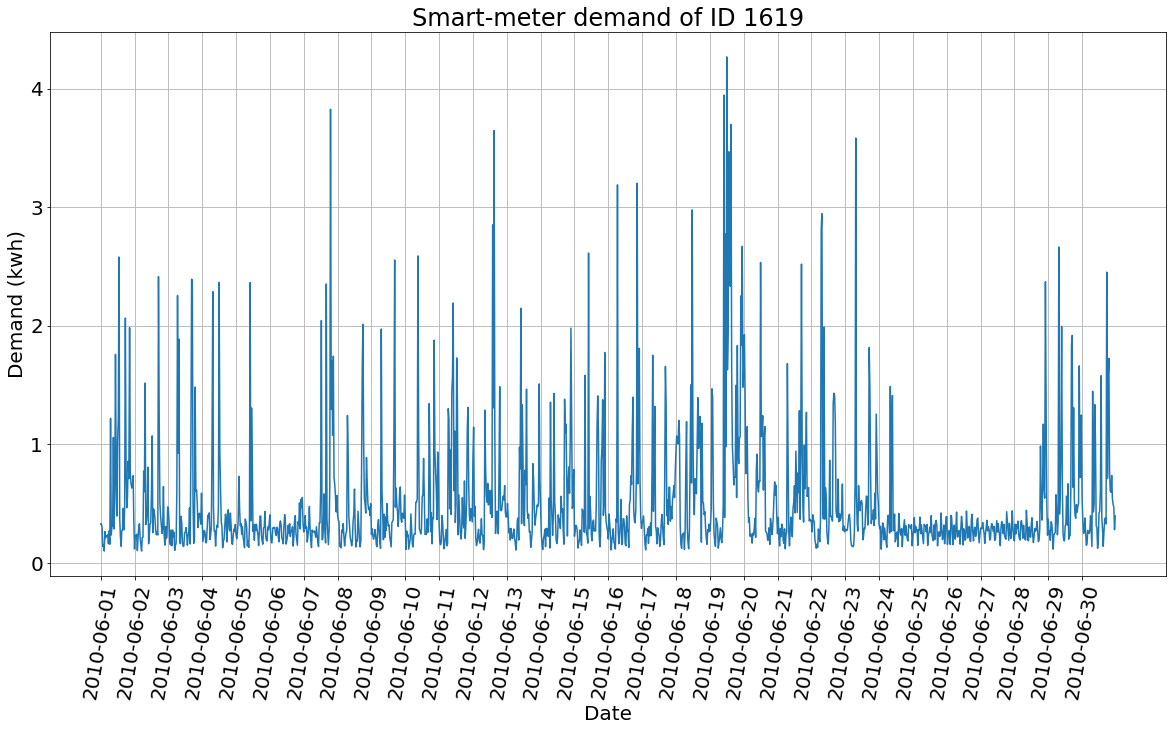

In [49]:
id_wanted = 1619
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

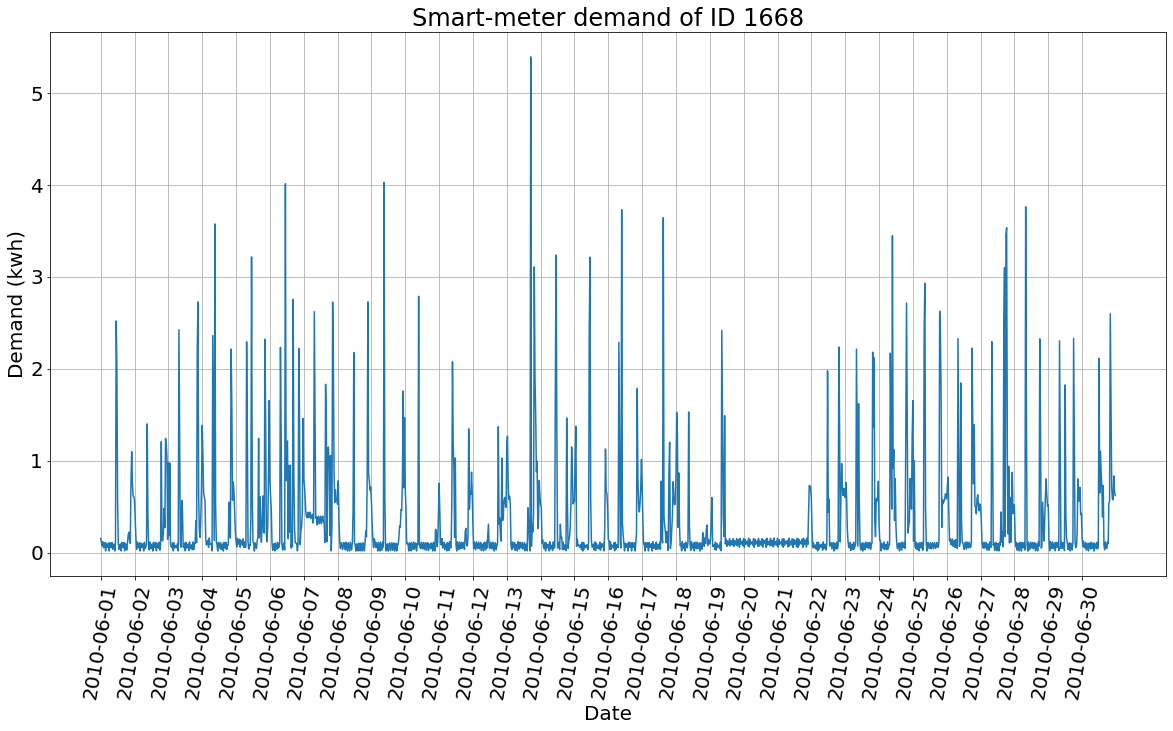

In [50]:
id_wanted = 1668
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

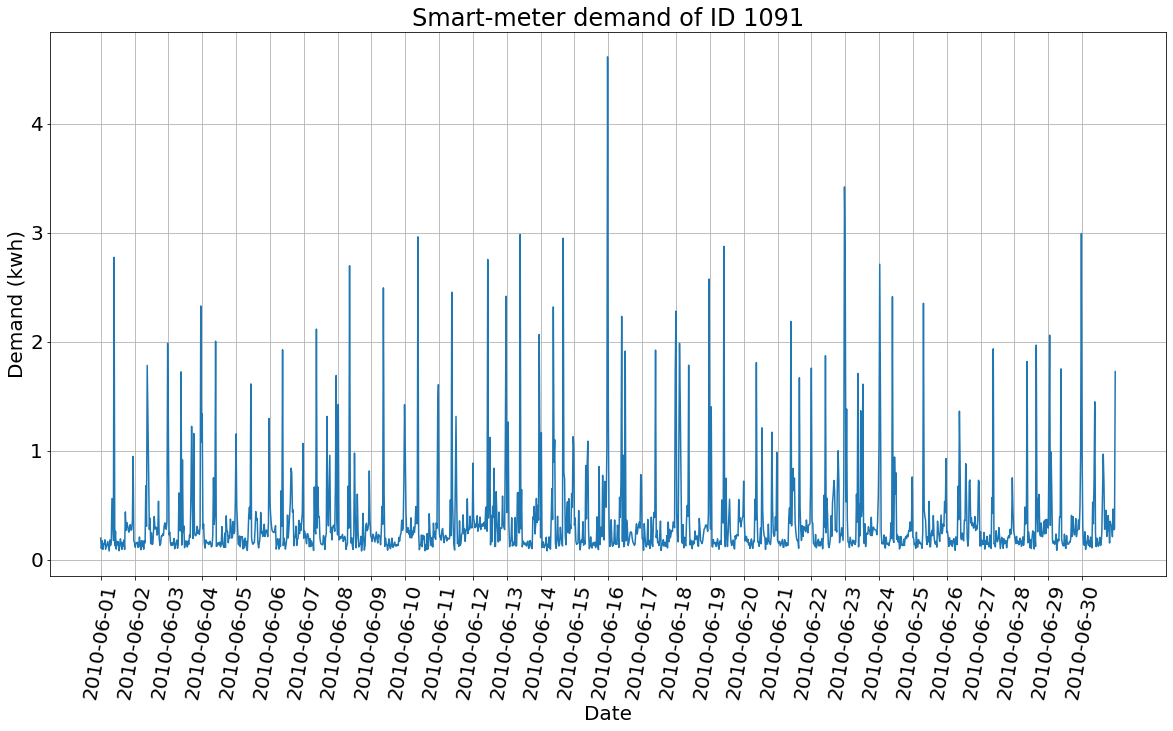

In [51]:
id_wanted = 1091
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

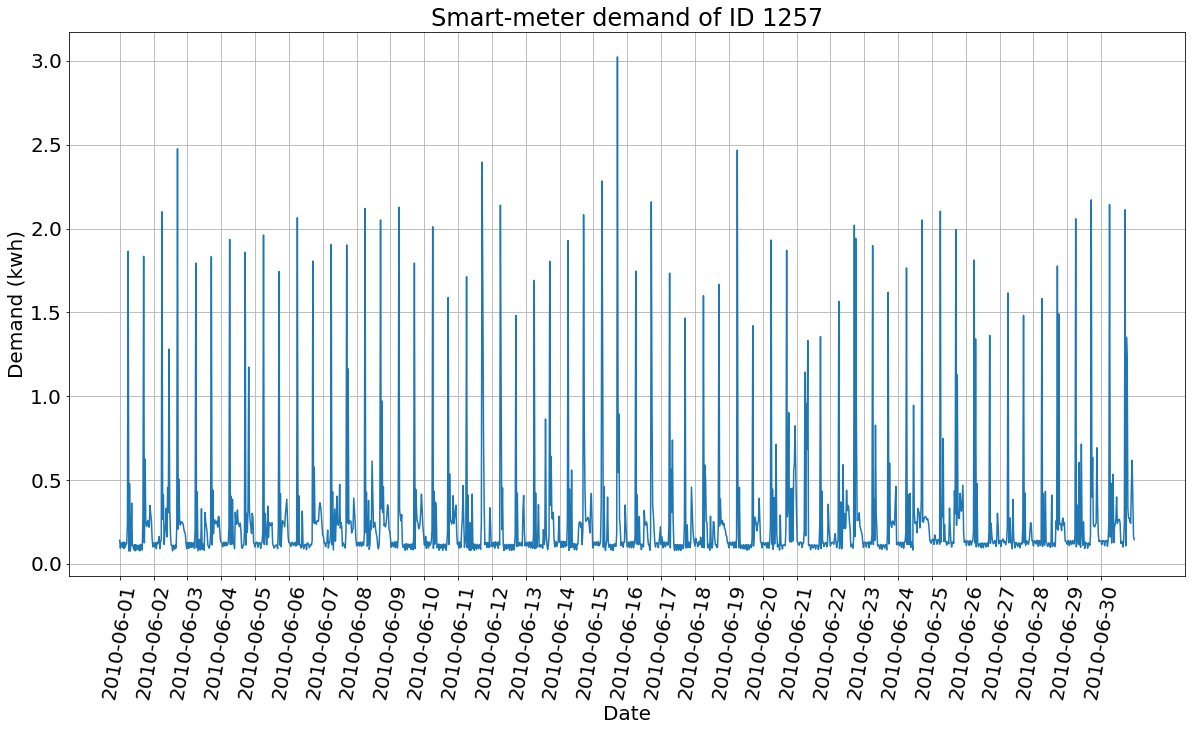

In [52]:
id_wanted = 1257
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

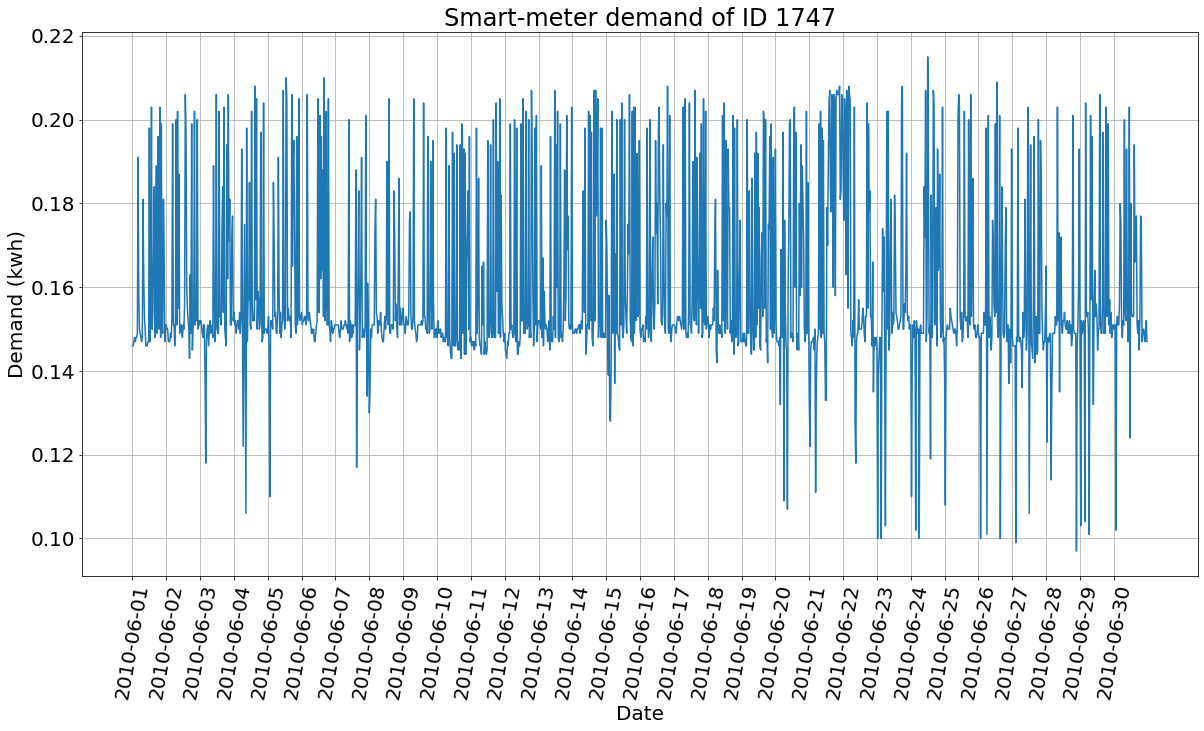

In [53]:
id_wanted = 1747
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

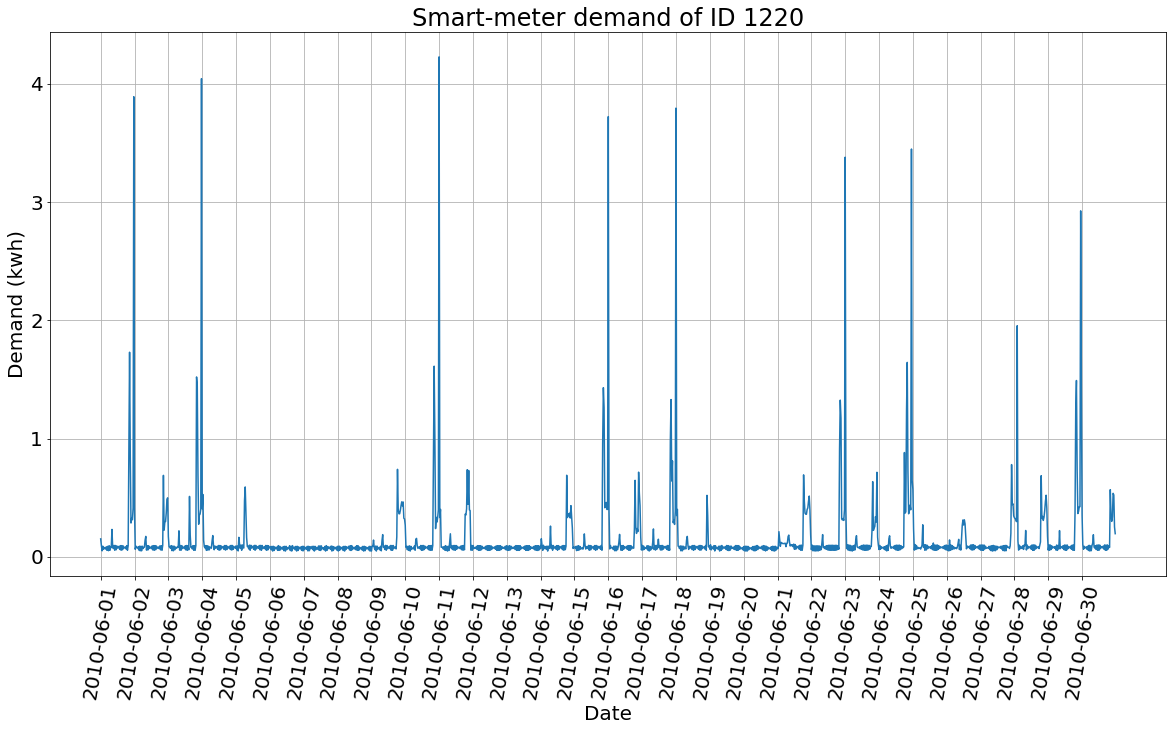

In [54]:
id_wanted = 1220
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

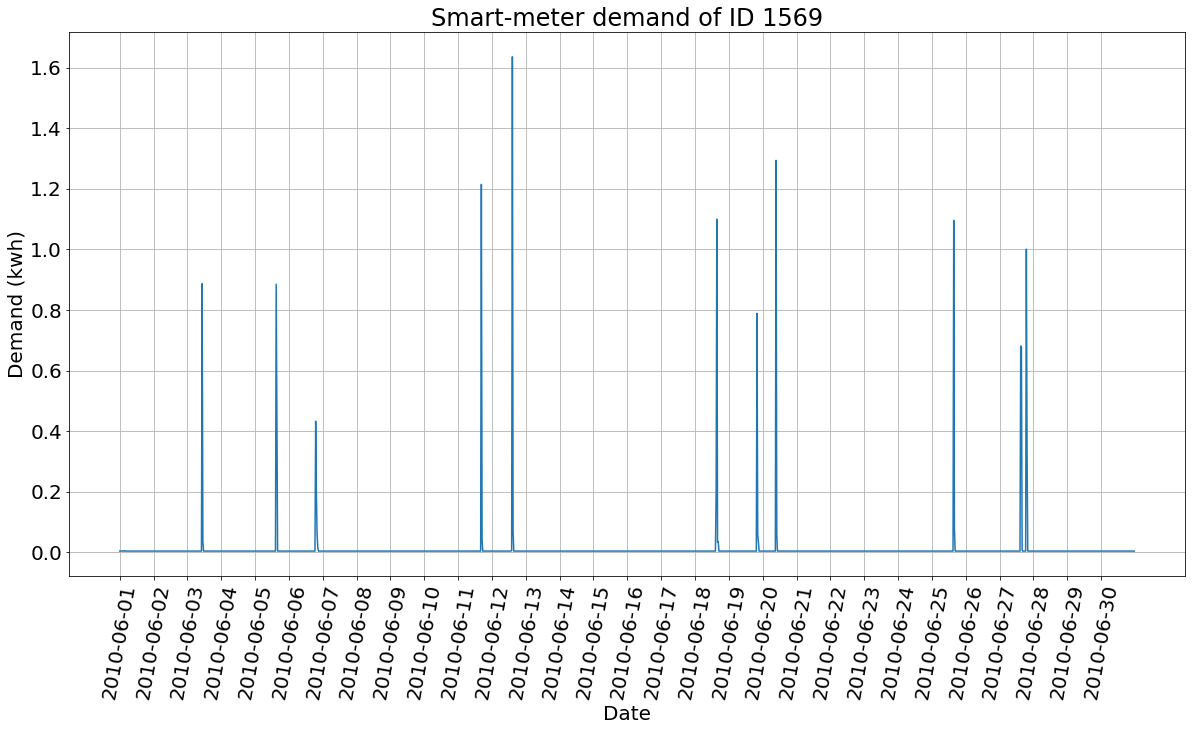

In [55]:
id_wanted = 1569
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

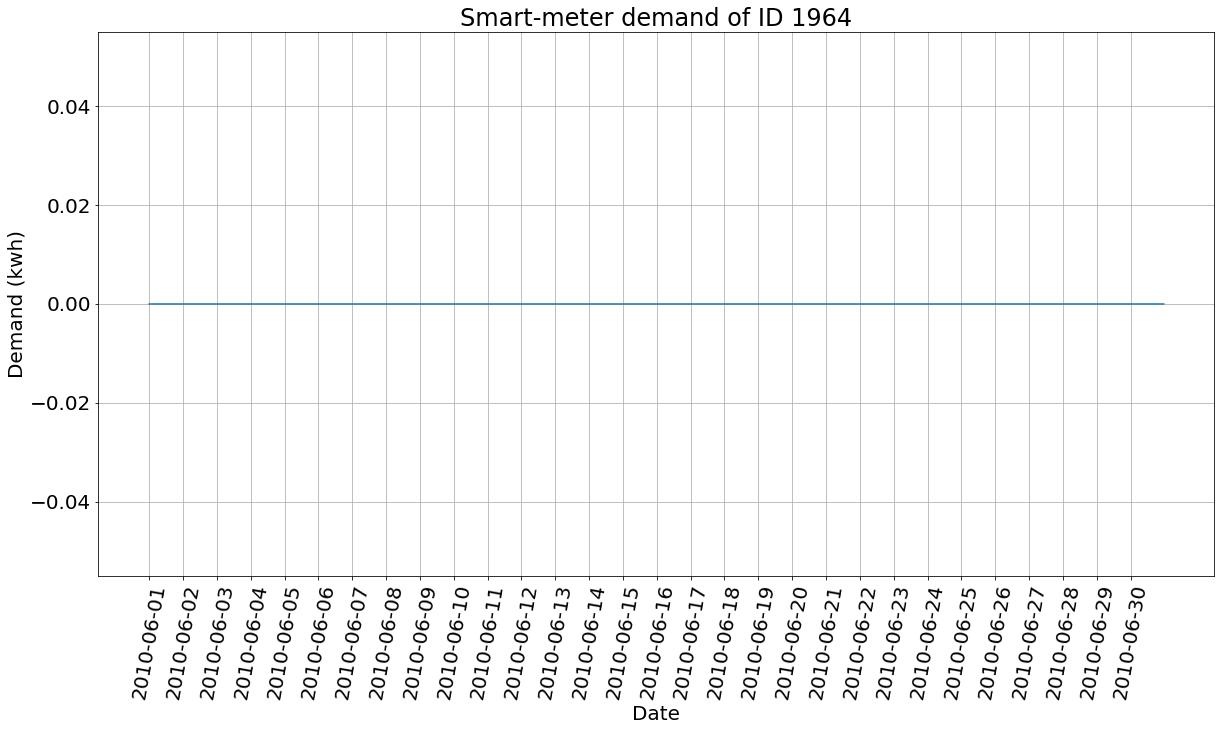

In [56]:
id_wanted = 1964
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

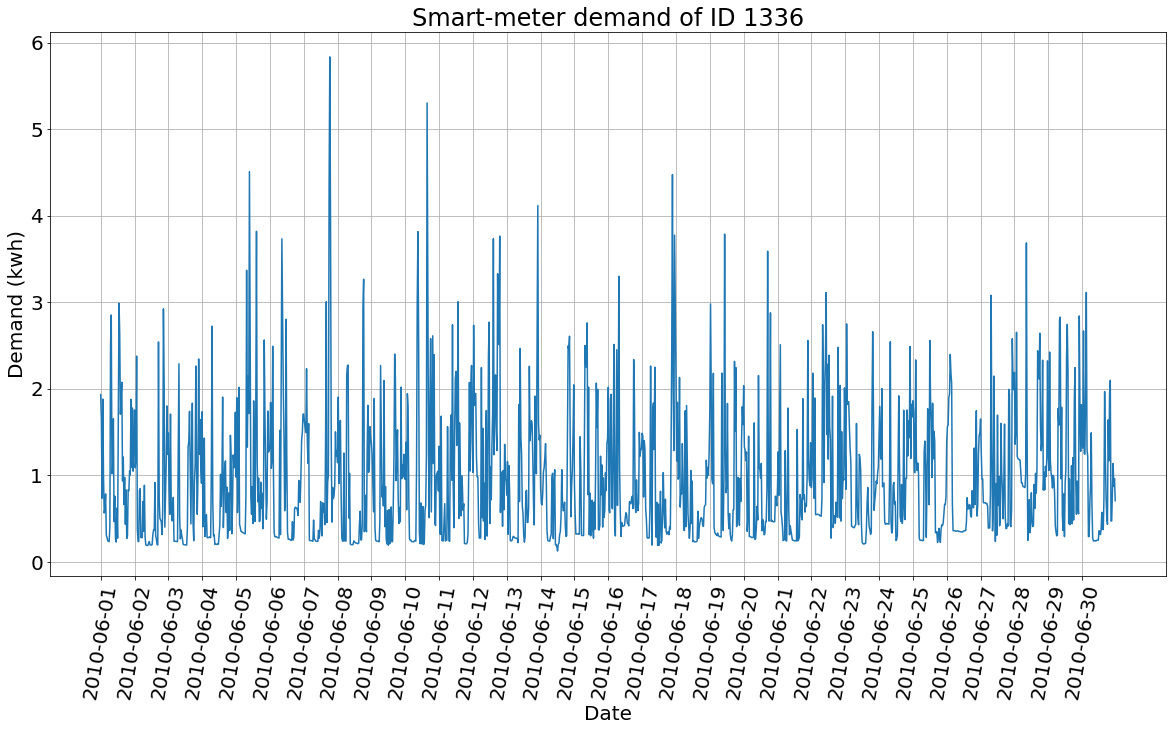

In [57]:
id_wanted = 1336
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()

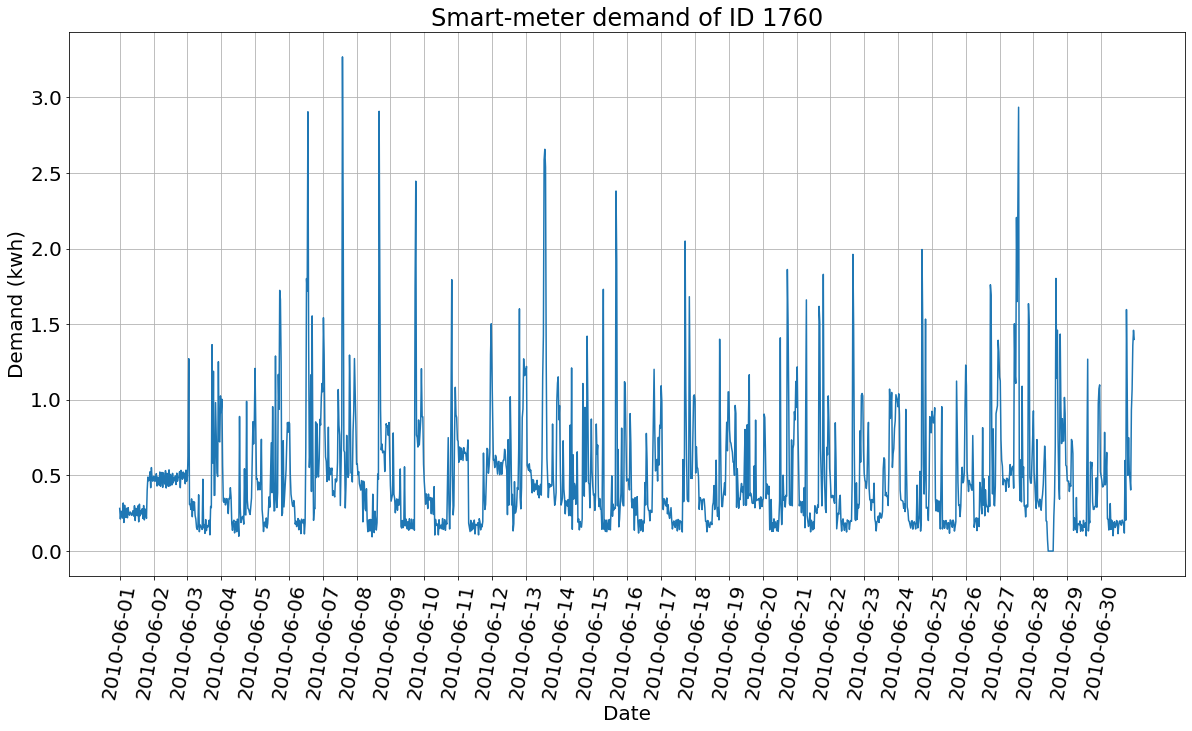

In [58]:
id_wanted = 1760
df_temp = ori_df[ori_df.id == id_wanted]
df_temp.reset_index(drop=True, inplace=True)

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot( df_temp["demand"])

date_list = pd.to_datetime(df_temp['date']).dt.date.unique().tolist()
plt.xticks(np.arange(0, 1440, step=48), date_list,
       rotation=80)  # Set text labels and properties.

plt.xlabel('Date')
plt.ylabel('Demand (kwh)')
plt.title('Smart-meter demand of ID '+str(id_wanted))
plt.grid()
plt.show()